**Locating Novel Digital Commodities Within a Cluster-Driven Model for Global Commodities**

With massive, recent interest in institutional investment in digital commodities, ie cryptocurrencies, US and other regulatory commissions effectively classify such assets as commodities. Given that these risk assets are typically priced in tandem with stock equity, and contrasted against US Treasury instruments, little scholarship has analyzed cryptocurrencies and digital assets as effective commodities, such as Sugar, Timber, Oil products or Grains.

Seeing Bitcoin as a necessary commodity to participate in cross border money exchange, ecommerce, or oil purchasing is necessary to justify considering it as a commodity, rather than a risk asset. For those who analye cryptocurrency as a holding, and analyze it via other valuation methods typically finds the exercise wanting, as valuation tends to look for underlying, fundamental value. The use case, also for Bitcoin and other digital commodities also leaves the analyst to wonder whether they are investing in Ponzi goods; Bitcoin is used to purchase hotel rooms, and at times, yachts or pizza slices, but it remains a held-good such as Gold.

**Why Cluster Commodities, to Study Bitcoin (or Hogs)?**

When digial commodities are analyzed alongside Oats, Gold, E-Mini Futures and other classical commodities, their prices covariance, against a pool of commodities can be tracked. Unifying digital commodities within pools of other commonly traded daily commodities allows another category of analysis to emerge, where traders simply shift from one commodity to another, as economic winds change, or opportunities simply justify a change of trading venue, ie a trend-shift toward energy away from equity, and we have seen since the start of a hot war in Ukraine.

**Using Cluster Matrices to Study Covariant, Affine Price Behaviors between Bitcoin and Other Commodity Flows**

This study samples the recent price behavior of 37 commodities, then traces the covariant, linear behavior, matrix style. Affine, or common mover groups are established, and presented interactively, for the viewer in a visual milieu.

Discussion of data pipeline used, and the subsequent data transformations needed in order to create this affine matrix, as well as the technical tools to facilitate this.

**Overview of Data Science Techniques**

The pipeline includes downloading data, introducing processing efficiencies, model building and cross validation, and cluster expression. I outline my steps as I take them, to arrive at a matrix of pricing which affords the following advantages.

The experiement was adapted from scikit-learn's own documentation, where the techniques were applied to the US stock market. My rendition creates several departures while adapting the advantage of Varoquaux's pipeline.[1]

1. The data ingest is fast, efficient, updateable and portable. Anyone may use this code to build a working model of US-traded commodities, and add symbols they wish to see, where I have missed them.
2. Data represent public, recently settled trades.
3. Local CPU resources are used in order to use notebook memory efficiently, and leverage local Linux resources.
4. Data remains in perpetuity for the analyst, or it may be rebuilt, using updated, daily trade series.
5. Data is built as a time series, in the OHLC format, where Opening, Closing, High and daily Low prices are located.
6. Clustering is aimed toward predictive use, where clusters can achieve whatever size is needed, to cluster affine, covariant items
7. Every commodity under consideration is measured for covariance against each other, to locate a product that trades in the same linear way
8. Sparse Inverse Covariance is the technique used to identify relationships between every item in the Matrix, and thus explose clusters of products, trading similarly. This is a list of connected items, trading conditionally upon the others.Thus the list is a useable, probable list of items which trade in the same way, over a week of US business.
9. An edge model exposes the borders for classification, and locates clusters at its discretion. Thus, no supervised limits are imposed in cluster formation.
10. Hyperparameters are determined via search with a predetermined number of folds, where each subset is used to locate model parameters, which are averaged at the close of the run.
11. Given the large volume of colinear features, a cross validation technique is used to 'lasso' model features.

**Building the Data Science Environment for Linux and Python**

Use the following commands to interface with your underlying linux environment. These may not need to be commented out, but will remain necessary each time a new kernel boot, in your notebook, takes place.

In [ ]:
!pip install yfinance
!pip install vega_datasets

**Data Ingest from Public Markets**

The free, common Yahoo Finace API is used to download data from all commodites you wish to see studied. This data will be stored persistently next to your notebook in common environments such as Binder.

Please note that if you deploy this notebook in Google Collab that the 37+ files downloaded will be erased between uses, but can be rebuilt easily each time you operate this notebook.

The data you download becomes permanently usable, and the ingest request below can be customized in order to grab more, or less data and at different intervals.[2]

I have included several exceptions to the download and renaming technique, in order to tolerate commodities with differing ticker symbols.

In [ ]:
import yfinance as yf
from time import time,ctime, clock_gettime
from time import gmtime, time, time_ns

def ifs(input):
    ni = ''
    if input =='nke':
        input = 'NKE'
        ni = "NK=E"
    elif input == 'ads':
        input = 'ADS'
        ni = "AD=S"
    else:
        input = input.upper()
        ins = "="
        before = "F"
        ni = input.replace(before, ins + before , 1)
    print(ni)
    data = yf.download(
        tickers = ni,
        period = "500d",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
    epoch = ctime()
    filename = input
    data.to_csv(filename)
#!ls #only in jupy

The following code defines the function for donwloading historical stock data from Yahoo Finance. It modifies the ticker symbol, download the data, and saves it to a CSV file. The modifications to the ticker symbol ensures compatibility with Yahoo's Finance API.

In [ ]:
symbol_dict = {"NKE":"Nike","Crox":"Crocs","ADS.DE":"Adidas AG","CPRI":"Capri","JWN":"Nordstrom","SKX":"Sketchers U.S.A",
               "PUMSY":"Puma","WWW":"Wolverine World Wide"} #QQ, SPY , TNX, VIX

# symbol_dict = {"AAL":"American Airlines", "DAL":"Delta Airlines", "BTCF":"Bitcoin Futures"}

# symbol_dict  ={"AVAX-USD":"Avalanche", "BTC-USD":"Bitcoin","znf":"US treasury 10yr", "APPL":"Apple"}

In this cell what it does is dictionary map stocks or financial instruments symbols to their corresponding company or asset names. This code serves as a convenient lookup table, allowing you to easily associate symbols with their respective entities or assets, which can be helpful in data analysis or visualization tasks involving financial data.







In [ ]:
#read in csv data from each commodity capture, gather
#assign 'open' to an array, create df from arrays
import numpy as np
import pandas as pd
from  scipy.stats import pearsonr


sym, names = np.array(sorted(symbol_dict.items())).T

for i in sym:    #build all symbol csvs, will populate/appear in your binder. Use linux for efficient dp
    ifs(i)

quotes = []
lens = []
for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    lens.append(t.shape[0])
mm = np.amin(lens)-1
print("min length of data: ",mm)

for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    t= t.truncate(after=mm)
    quotes.append(t)
mi = np.vstack([q["Close"] for q in quotes]) #min
ma = np.vstack([q["Open"] for q in quotes]) #max

volatility = ma - mi

ADS.DE
[*********************100%%**********************]  1 of 1 completed
CPRI
[*********************100%%**********************]  1 of 1 completed
CROX
[*********************100%%**********************]  1 of 1 completed
JWN
[*********************100%%**********************]  1 of 1 completed
NKE
[*********************100%%**********************]  1 of 1 completed
PUMSY
[*********************100%%**********************]  1 of 1 completed
SKX
[*********************100%%**********************]  1 of 1 completed
WWW
[*********************100%%**********************]  1 of 1 completed
min length of data:  494


The significance of this cell is to prepare and organize financial data for multiple symbols, ensuring they have a consistent length for further analysis. The volatility is then calculated, which could be crucial for assessing risk or market trends across different financial instruments.

**Data Format**

After downloading this massive store of data, you should click on a file, in your project. Using the file browser, you will see a large quantity of new files.

When you open one, you will see the rows of new data.


**Cross Validate for Optimal Parameters: the Lasso**

Varoquaux's pipeline involves steps in the following two cells.

A set of clusters is built using a set of predefined edges, called the edge model. The volatility of every OHLC tick is fed into the edge model, in order to establish every commodity's covariance to eachother.

The advantages of the Graphical Lasso model is that a cross validated average set of hyperparameters is located, then applied to cluster each commodity. Thus, every commodity is identified with other commodities which move in tandem, together, over seven days. I print the alpha edges below, and visualize this group.

Depending upon the markets when you run this study, more intensive clustering may take place at either end of the spectrum. This exposes the covariance between different groups, while exposing outlier clusters.

**Using the Interactive Graph**

Feel free to move your mouse into the graph, then roll your mouse. This will drill in/out and allow you to hover over data points. They will mape to the edges of the clusters, under investigation.




In [ ]:
from sklearn import covariance
import altair as alt
alphas = np.logspace(-1.5, 1, num=15)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)
X = volatility.copy().T
X /= X.std(axis=0)
l =edge_model.fit(X)
n= []
print(type(l.alphas))
for  i in range(len(l.alphas)):
    print(l.alphas[i])
    dict = {"idx":i , "alpha":l.alphas[i]}
    n.append(dict)

dd = pd.DataFrame(n)
alt.Chart(dd).mark_point(filled=True, size=100).encode(
    y=alt.Y('idx'),
    x=alt.X('alpha'),tooltip=['alpha'],).properties(
        width=800,
        height=400,
        title="Edges Present Within the Graphical Lasso Model"
    ).interactive()

<class 'numpy.ndarray'>
0.03162277660168379
0.047705826961439296
0.07196856730011521
0.10857111194022041
0.16378937069540642
0.2470911227985605
0.372759372031494
0.5623413251903491
0.8483428982440722
1.279802213997954
1.9306977288832505
2.9126326549087382
4.39397056076079
6.628703161826448
10.0


alt.Chart(...)

This code fits a Graphical Lasso model to the standardized data and visualizes the alpha values against their corresponding indices. This is useful for understanding the selection of alpha values and their impact on the edges present within the Graphical Lasso model. Where it displays a graphical display model.

**Definining cluster Membership, by Covariant Affinity**

Clusters of covariant, affine moving commodities are established. This group is then passed into a dataframe so that the buckets of symbols can become visible.

In [ ]:
from sklearn import cluster
                                                    #each symbol, at index, is labeled with a cluster id:
_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()                             #integer limit to list of clusters ids
# print("names: ",names,"  symbols: ",sym)
gdf = pd.DataFrame()
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(np.array(sym)[labels == i])}")
    l = np.array(sym)[labels == i]
    ss = np.array(names)[labels == i]
    dict = {"cluster":(i+1), "symbols":l, "size":len(l), "names":ss}
    gdf = gdf.append(dict, ignore_index=True, sort=True)

gdf.head(15)


Cluster 1: ADS.DE
Cluster 2: CPRI, Crox, JWN, NKE, SKX, WWW
Cluster 3: PUMSY


<ipython-input-15-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-15-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)
<ipython-input-15-716215b636ca>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(dict, ignore_index=True, sort=True)


,cluster,names,size,symbols
0,1,[Adidas AG],1,[ADS.DE]
1,2,"[Capri, Crocs, Nordstrom, Nike, Sketchers U.S....",6,"[CPRI, Crox, JWN, NKE, SKX, WWW]"
2,3,[Puma],1,[PUMSY]


This code segment applies affinity propagation clustering, prints the symbols in each cluster, and creates a DataFrame (gdf) summarizing information about each cluster, such as cluster number, symbols, size, and names. The DataFrame is then printed to display the cluster information for further analysis. Then it clusters into a more defining and simple display to show you how it will look like.







**Visualizing cluster and affine commodities, by volatility**

The interactive graphic requires the user to hover over each dot, in teh scatter chart. The size of the commodity cluster pushes it to the top, where the user can study the members, whose prices move in covariant fashion.

I have experimented with laying the text of the commodity group over the dots, but I find that the above table is most helpful, in identifying markets which move in tandem, and with similar price graphs. Also, as groups expand and contract, overlaying text on the chart below may prevent certain clusters from appearing. I appreciate spacing them out, and not congesting the chart.

The user is free to study where his or her chosen commodity may sit, in close relation to other globally relevant commodities.

In [ ]:
for i in gdf['cluster']:
    print("cluster ",i)
    d = gdf[gdf['cluster'].eq(i)]
    for j in d.names:
        print(j, ", ")

cluster  1
['Adidas AG'] , 
cluster  2
['Capri' 'Crocs' 'Nordstrom' 'Nike' 'Sketchers U.S.A'
 'Wolverine World Wide'] , 
cluster  3
['Puma'] , 


This code is iterating through clusters in a DataFrame (gdf) and printing the cluster index along with the corresponding names from the 'names' column for each cluster. Then once you command enter it displays the companies under each cluster.

In [ ]:
import altair as alt
def runCluster():
    c = alt.Chart(gdf).mark_circle(size=60).encode(
        x= alt.X('cluster:N'),
        y= alt.Y('size:Q'),
        color='size:Q',
        tooltip=['names'],
        size=alt.Size('size:Q')
    ).properties(
        width=800,
        height=400,
        title="40 Top Global Commodities, Clustered by Affine Covariance"
    ).interactive()
    #.configure_title("40 Top Global Commodities, Clustered by Affine Covariance")

    chart =c
    return chart
runCluster()



This code defines a function that creates an Altair scatter plot visualizing global commodities clustered by affine covariance. The chart includes information about clusters, sizes, colors, and tooltips for each data point. The resulting chart is interactive and can be used for exploratory data analysis.

**References**

1. Gael Varoquaux. Visualizing the Stock Market Structure. Scikit-Learn documentation pages, https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
2. Ran Aroussi. YFinance API documents. https://github.com/ranaroussi/yfinance
3. The Altair Charting Toolkit. https://altair-viz.github.io/index.html

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

df_symbol = pd.read_csv('NKE')    #no .csv

In [ ]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df_symbol.head(2)

,Date,Open,High,Low,Close,Volume
0,2021-12-21,162.813592,167.208943,160.879641,162.754990,13862900
1,2021-12-22,163.350810,165.069876,160.274055,161.592667,5811300


The provided code uses the Plotly library and Pandas to read a CSV file named 'NKE' (without the .csv extension) and stores the data in the DataFrame df_symbol.

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df_symbol['Date'],
                open=df_symbol['Open'],
                high=df_symbol['High'],
                low=df_symbol['Low'],
                close=df_symbol['Close'])])
fig.show()

Putting it all together, this code creates a candlestick chart using the stock market data stored in the DataFrame df_symbol. The 'Date' column is used for the x-axis, and the 'Open', 'High', 'Low', and 'Close' columns are used to determine the corresponding prices for each candlestick on the chart.



In [ ]:
# Using plotly.express
import plotly.express as px

df2 = px.data.stocks()
fig = px.line(df2, x='date', y="NFLX")
fig.show()

This code snippet is essential for visualizing the stock prices of the "NFLX" (Netflix) stock over time. The line plot provides a clear representation of how the stock's value changes with respect to the date, offering insights into trends and patterns in the stock's performance.

In [ ]:
df2.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [ ]:
df2.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


In [ ]:
df2['AMZN']

0      1.000000
1      1.061881
2      1.053240
3      1.140676
4      1.163374
         ...   
100    1.425061
101    1.432660
102    1.453455
103    1.521226
104    1.503360
Name: AMZN, Length: 105, dtype: float64

In [ ]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df_symbol['Close']

0      162.754990
1      161.592667
2      161.817307
3      163.682922
4      162.549896
          ...    
495    118.610001
496    119.639999
497    121.169998
498    121.019997
499    121.550003
Name: Close, Length: 500, dtype: float64

In [ ]:
# Using plotly.express
import plotly.express as px
fig = px.line(df_symbol, x='Date', y="Close") #contains BTCF daily price series
fig.show()

This cell is using the plotly.express library to create a line plot. Specifically, it's plotting the daily closing prices of a financial asset (presumably cryptocurrency with the symbol "BTCF") over time. The resulting plot provides a visual representation of how the closing prices of the specified financial asset have changed over the given time period. The significance of this cell lies in its ability to offer a quick and intuitive visualization of the trend in the daily closing prices, aiding in the analysis of potential patterns or movements in the financial data.

#Plotting the Clustered Commodities

In [ ]:
#generate a Date column in gdf
def getDateColumn():
  df = pd.read_csv('BTCF')  #CHOOSE an equity or vehicle for which you possess a Date index
  return df['Date']  #pandas series

This code is designed to facilitate the extraction of the 'Date' column from a financial dataset. In data science and analysis, having a Date column is crucial for time-series analysis, plotting temporal trends, and conducting various time-based analyses on financial data.

In [ ]:
symUpper = [x.upper() for x in sym] #make all symbols in sym to uppercase
# print(symUpper)
gdf = pd.DataFrame(columns=symUpper) #form a new global dataframe, gdf, for purpose of graphing
# gdf['Date'] = getDateColumn()            #get a common index for dates, for every commodity or equity
for i in range(len(symUpper)):           #iterate the length of the uppercase symbols
  df_x = pd.read_csv( symUpper[i])       #create one dataframe to hold the csv contents
  gdf[symUpper[i]] = df_x['Close']       #extract the price series from the 'Closed' column
print(gdf.head(3))                       #print the resulting top three rows from the new gdf
# print(gdf.columns)


       ADS.DE       CPRI        CROX        JWN         NKE      PUMSY  \
0  238.779755  61.000000  138.929993  19.082104  162.754990  11.167969   
1  249.044586  61.419998  139.779999  19.570444  161.592667  11.478460   
2  248.311386  61.689999  123.529999  20.003500  161.817307  11.488163   

         SKX        WWW  
0  41.110001  27.015612  
1  41.610001  27.072409  
2  42.270000  27.271191  


This code prepares a global DataFrame by extracting closing prices from CSV files associated with each uppercase symbol. The resulting DataFrame is then printed to inspect the structure and content.







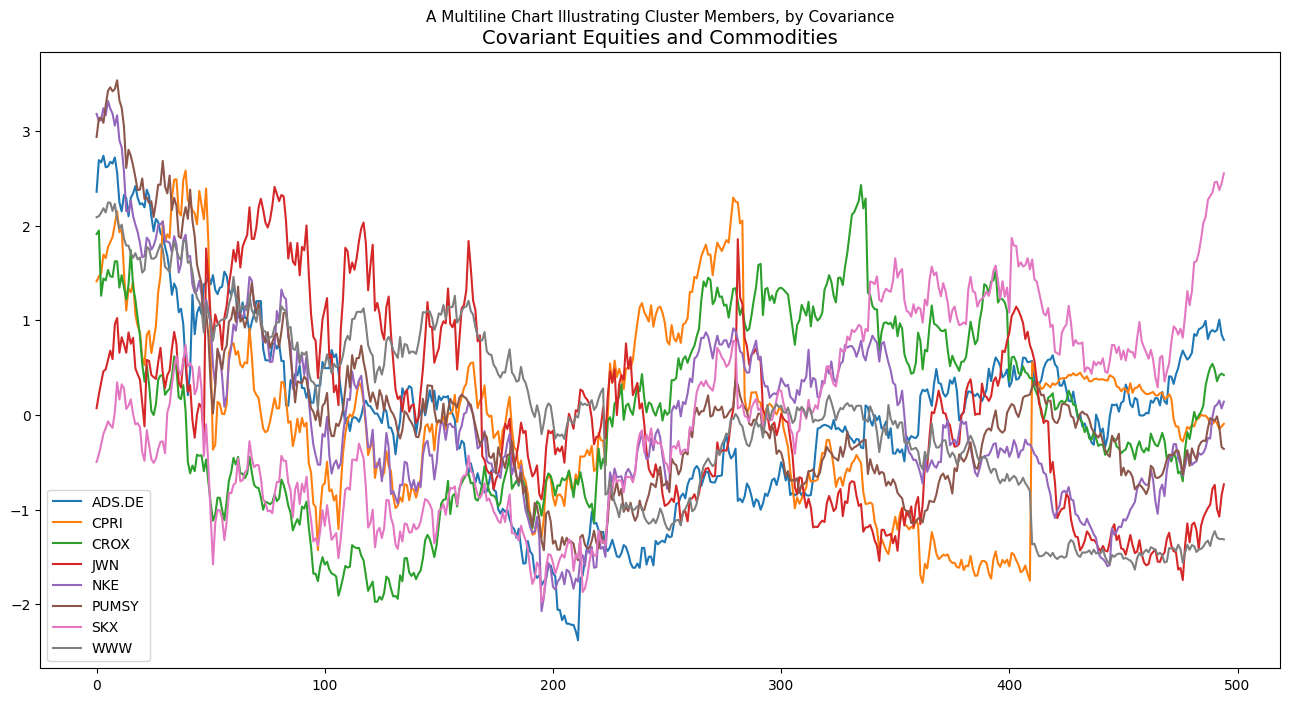

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_gdf = pd.DataFrame(scaler.fit_transform(gdf), columns=gdf.columns)

# plot the dataframe
fig, ax = plt.subplots(figsize=(16, 8))
scaled_gdf.plot.line(ax=ax)

# add title and subtitle
ax.set_title('Covariant Equities and Commodities', fontsize=14)
ax.text(0.5, 1.05, 'A Multiline Chart Illustrating Cluster Members, by Covariance',
        horizontalalignment='center',
        fontsize=11,
        transform=ax.transAxes)
# show the plot
plt.show()


This code takes a DataFrame, standardizes its values, creates a new DataFrame with the standardized values, and then produces a line plot of the standardized data with a title and subtitle for better interpretation. The visualization then tend to appear as a multiline chart illustrating cluster members based on covariance between equities and commodities.